In [1]:
#Online shopping Customer Segmentation
#**Problem statement**

# 1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
# 2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
# 3.Top 10 selling product 
# 4 Best product at country level.
# 5 FINDING CUSTOMER VALUATION.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [14]:
df=pd.read_excel("Online_shopping.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.shape

(541909, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
# 1- Total 8 feature and this one is clustering problem so no target variable column is there.Data set consists of 541909 rows
# 2- InvoiceDate column is already in datetime format
# 3- Has null values in few features as well
# 4- In cistomerID coloum we have null values.

In [17]:
df.isnull().sum()/len(df1)*100

InvoiceNo       0.000000
StockCode       0.000000
lower          99.664888
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [18]:
df.duplicated().sum() # Ignoring duplicates

5268

In [19]:
df1=df.copy()

In [20]:
df1=df1.dropna(subset=['CustomerID'])

In [21]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
lower          405387
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

In [22]:
# Droping columns are insignificant for customer segmentation
df2 = df1.drop(['StockCode','Description', 'Country','lower'], axis = 1)
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00000,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08000,4.13,38970.0
CustomerID,541909.0,15287.690570,1484.746010,12346.00,14367.00,15287.69057,16255.00,18287.0


In [13]:
#From descriptive statistics we can see that some of the order in quantity column are negative quantity.
#It occurs when customer returns the defective product.
# For total Sale we have to multiply 'Quantity' with 'UnitPrice'
# In two ways we can handle negative quantity entries
#1- Replace the negative quanity by 0 also so that total sale amount will be 0 for that entry
#2- Leave the negative quantity as it is so that total sale will -ve and it will cancel out the +ve sale of that item to balance out

# But at least customer came and buy something so we need to count that sale amount so lets fill -ve qty by 0

In [23]:
df2=df2[(df2["Quantity"]>0)]

In [24]:
df2.shape
# By removing negative and 0 quantity items we have reduced 10624 rows but considered the sales done.

(397924, 5)

In [25]:
#Creating another column by calculating Total Sale (Sale= Qty x UnitPrice)
df2["Total"]=df2["Quantity"]*df2["UnitPrice"]
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


# 2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count

Now we are going to analize -

1.when is the sales highest (month/season/day/timing)

2.when is the rush hour (month/season/day)

3.when the rush as per timing (morning,afternoon,evening) as per day(weekday/weekend)

4.Monthly sales trend

In [70]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [71]:
df2.shape

(531285, 6)

In [72]:
# Extration of day,month,hour from invoicedate
import datetime as dt
df2["Day"]=df2["InvoiceDate"].dt.day_name()
df2["Month"]=df2["InvoiceDate"].dt.month
df2["Hour"]=df2["InvoiceDate"].dt.hour

In [73]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Day,Month,Hour
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,12,8
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,12,8
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8


# Function to create season and timing column

In [74]:
# Deriving season
def cal_season(x):
    if x in [11,12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Summer'
    elif x in [6,7,8]:
        return 'Monsoon'
    else:
        return 'Post Monsoon'

In [75]:
# Deriving timing
def cal_timing(x):
    if x in range(0,5):
        return 'Early Morning(0:00 - 4:00 Hours)'
    elif x in range(5,11):
        return 'Morning(5:00 - 11:00 Hours)'
    elif x in range(11,16):
        return 'Afternoon(11:00 - 17:00 Hours)'
    elif x in range(17,20):
        return 'Evening(17:00-20:00 Hours)'
    else :
        return 'Night(20:00-00:00 Hours)'

In [76]:
df2['season'] = df2['Month'].apply(cal_season)
df2['Timing'] = df2['Hour'].apply(cal_timing)

In [77]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Day,Month,Hour,season,Timing
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)


In [78]:
df2['Month'] = df2['InvoiceDate'].dt.month_name()
df2['weekend']=np.where((df2['Day']=='Saturday')|(df2['Day']=='Sunday'),'Yes',"No")

In [79]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Day,Month,Hour,season,Timing,weekend
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No


# Analyzing rush hour i.e total number of invoice is more

In [80]:
day_count = df2.groupby('Day')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
day_count
#Thers is no sale on saturday so we can conclude that Mall is closed on every Saturday

,Day,count_of_invoices
0,Friday,80483
1,Monday,93308
2,Sunday,63910
3,Thursday,101221
4,Tuesday,99804
5,Wednesday,92559


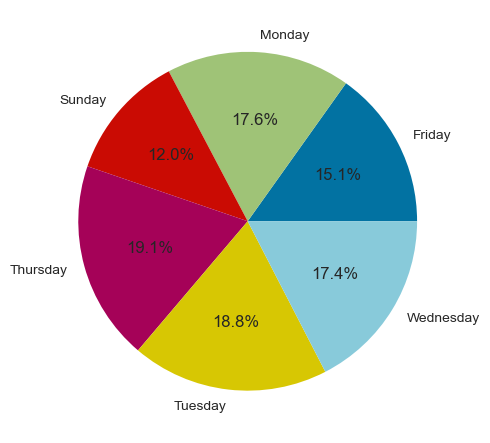

In [81]:
plt.pie(day_count.count_of_invoices,labels=day_count['Day'],autopct='%.1f%%')
plt.show()

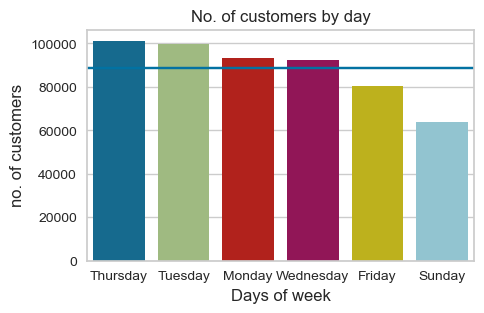

In [82]:
# plot number of customers by day graph
day=df2["Day"].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(day.index,day.values)
#plot the average blue line
plt.axhline(y=day.mean())
plt.title("No. of customers by day")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("Days of week",fontsize=12)
plt.show()

In [83]:
#hour_count = df2.groupby('Timing')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
#hour_count
hour_count = df2.groupby('Timing')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
hour_count

,Timing,count_of_invoices
0,Afternoon(11:00 - 17:00 Hours),347317
1,Evening(17:00-20:00 Hours),39682
2,Morning(5:00 - 11:00 Hours),90835
3,Night(20:00-00:00 Hours),53451


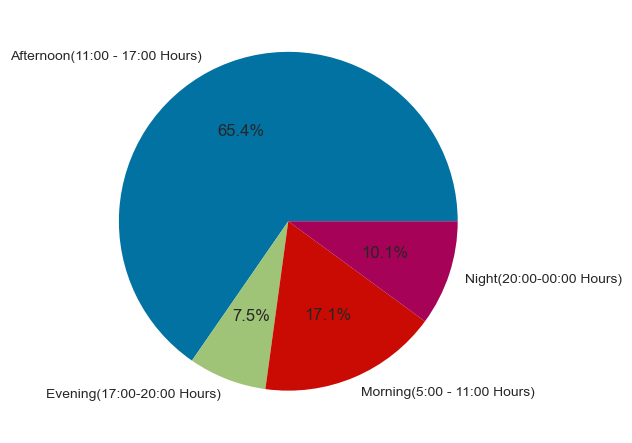

In [84]:
plt.pie(hour_count.count_of_invoices,labels=hour_count['Timing'],autopct='%.1f%%')
plt.show()

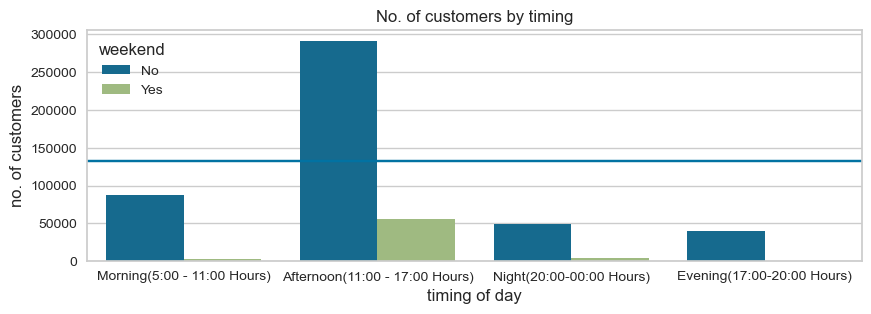

In [85]:
# plot number of customers by timing-weekend graph
timing=df2["Timing"].value_counts()
plt.figure(figsize=(10,3))
sns.countplot(x=df2['Timing'],hue=df2['weekend'])
#plot the average customers line
plt.axhline(y=timing.mean())
plt.title("No. of customers by timing")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("timing of day",fontsize=12)
plt.show()

In [86]:
#month_count = df2.groupby('Month')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
#month_count
month_count = df2.groupby('Month')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
month_count

,Month,count_of_invoices
0,April,29171
1,August,34566
2,December,66818
3,February,27184
4,January,34350
5,July,38716
6,June,36056
7,March,35915
8,May,36292
9,November,83498


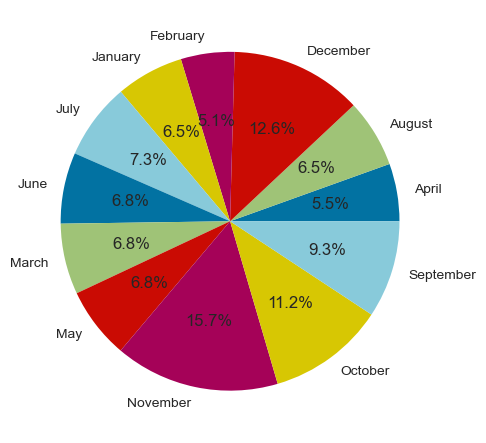

In [87]:
plt.pie(month_count.count_of_invoices,labels=month_count['Month'],autopct='%.1f%%')
plt.show()

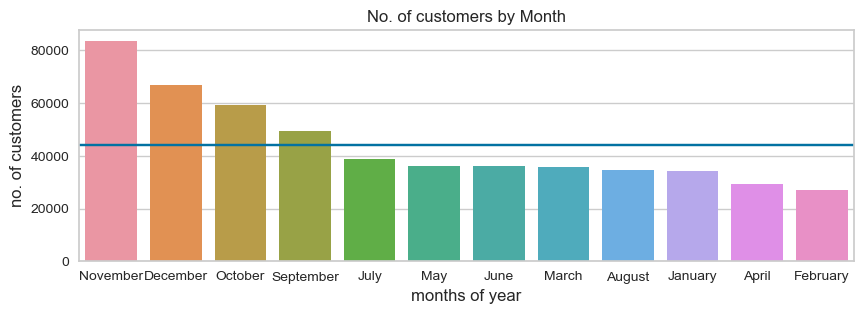

In [88]:
# plot number of customers by month graph
Month=df2["Month"].value_counts()
plt.figure(figsize=(10,3))
sns.barplot(Month.index,Month.values)
#plot the average 
plt.axhline(y=Month.mean())
plt.title("No. of customers by Month")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("months of year",fontsize=12)
plt.show()

In [89]:
#season_count = df2.groupby('season')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
#season_count
season_count = df2.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')
season_count.reset_index(inplace=True)
season_count

,season,count_of_invoices
0,Monsoon,109338
1,Post Monsoon,108719
2,Summer,101378
3,Winter,211850


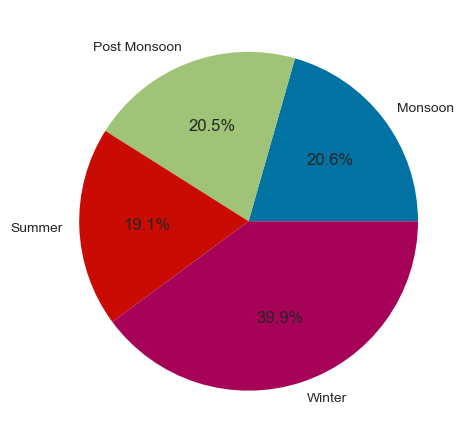

In [90]:
plt.pie(season_count.count_of_invoices,labels=season_count['season'],autopct='%.1f%%')
plt.show()

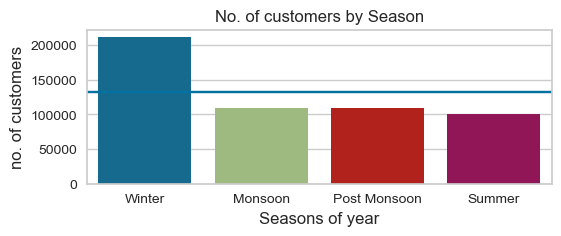

In [91]:
# plot number of customers by month graph
season=df2["season"].value_counts()
plt.figure(figsize=(6,2))
sns.barplot(season.index,season.values)
#plot the average line 
plt.axhline(y=season.mean())
plt.title("No. of customers by Season")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("Seasons of year",fontsize=12)
plt.show()

In [92]:
weekend_count = df2.groupby('weekend')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
weekend_count

,count
weekend,
No,467375
Yes,63910


# Now analysing Total Sales

In [93]:
day_sales = df2.groupby('Day')['Total'].sum().to_frame('Total_sales').sort_values(by = 'Total_sales', ascending = False).reset_index()
day_sales

,Day,Total_sales
0,Thursday,2203161.240
1,Tuesday,2178632.611
2,Wednesday,1851147.810
3,Friday,1818216.111
4,Monday,1779575.041
5,Sunday,813827.611


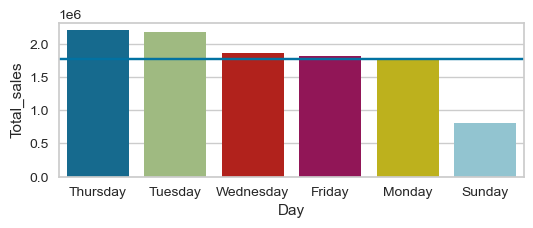

In [94]:
fig, ax = plt.subplots(figsize=(6,2))
sns.barplot(data=day_sales, x="Day", y="Total_sales")
#plot the average sale
plt.axhline(y=day_sales['Total_sales'].mean())

1.On Thursday and Tuesday sales are high.
2.Wednesday,Friday and Monday sales are equally average.
3.Sunday sales are lowest. This shows people don't like to shop on weekend or sunday.
4.There is no sale on saturday so we can conclude that mall is closed on every Saturday.

In [95]:
month_sales = df2.groupby('Month')['Total'].sum().to_frame('Total_sales').sort_values(by = 'Total_sales', ascending = False).reset_index()
month_sales

,Month,Total_sales
0,November,1509496.330
1,December,1462538.820
2,October,1154979.300
3,September,1058590.172
4,May,770536.020
5,June,761739.900
6,August,737014.260
7,July,719221.191
8,March,717639.360
9,January,691364.560


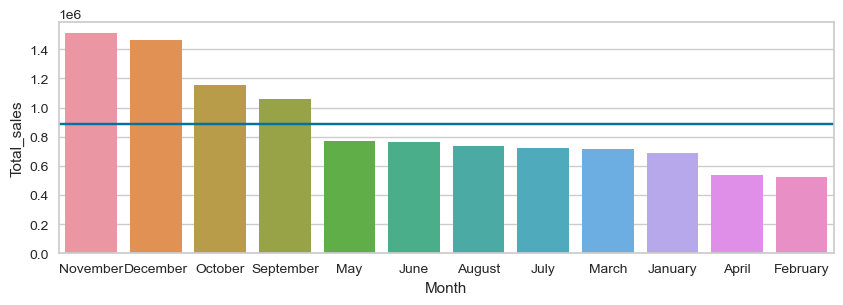

In [96]:
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(data=month_sales, x="Month", y="Total_sales")
#plot the average sale
plt.axhline(y=month_sales['Total_sales'].mean())

1.From September to Decenber sales are high, November is having highest sales.
2.April and February are having lowest sales and rest months are having average sales.

In [97]:
season_sales = df2.groupby('season')['Total'].sum().to_frame('Total_sales').sort_values(by = 'Total_sales', ascending = False).reset_index()
season_sales

,season,Total_sales
0,Winter,4187031.600
1,Monsoon,2217975.351
2,Post Monsoon,2213569.472
3,Summer,2025984.001


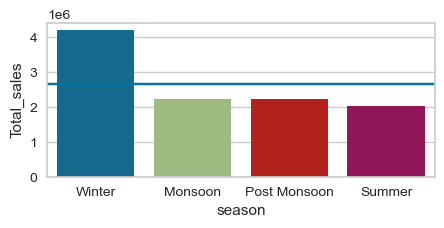

In [98]:
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(data=season_sales, x="season", y="Total_sales")
#plot the average sale
plt.axhline(y=season_sales['Total_sales'].mean())

1.Winter sales are the highest, may be due to festive season of Christmas.

In [99]:
Timing_sales = df2.groupby('Timing')['Total'].sum().to_frame('Total_sales').reset_index().sort_values(by = 'Total_sales', ascending = False)
Timing_sales

,Timing,Total_sales
0,Afternoon(11:00 - 17:00 Hours),6462597.051
2,Morning(5:00 - 11:00 Hours),2751942.502
3,Night(20:00-00:00 Hours),754006.560
1,Evening(17:00-20:00 Hours),676014.311


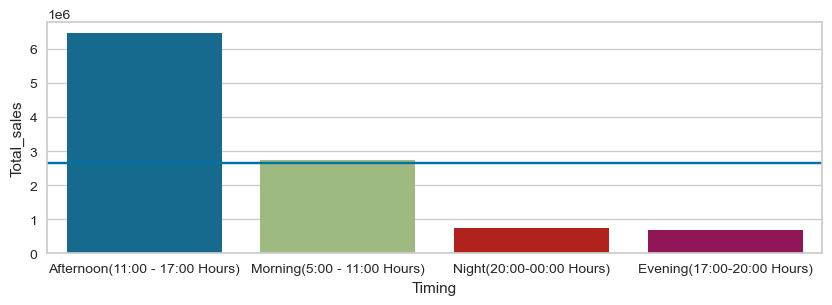

In [100]:
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(data=Timing_sales, x="Timing", y="Total_sales")
#plot the average sale
plt.axhline(y=Timing_sales['Total_sales'].mean())

1.People mostly like to shop in afternoon and on average in morning time.
2.At night and evening time people prefer to rest and relax than shopping

# Sales trends

<AxesSubplot:xlabel='Month_Year'>

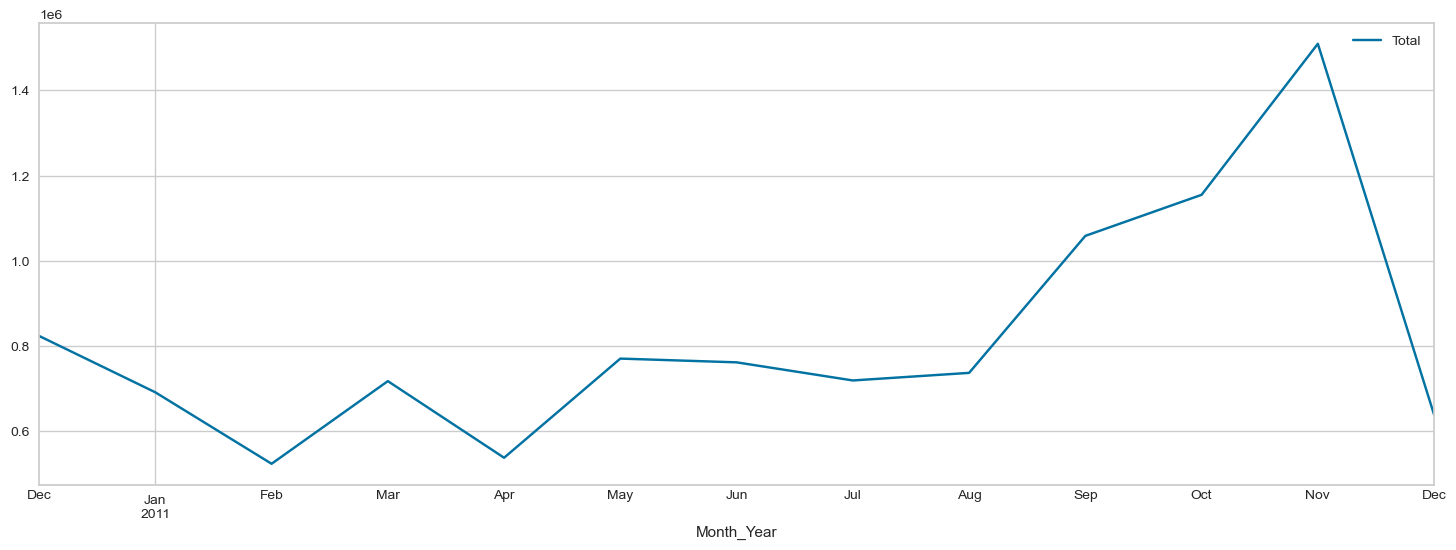

In [101]:
df2['Month_Year'] = df2['InvoiceDate'].dt.to_period('M')
sales = df2.groupby(['Month_Year']).sum()
sales[['Total']].plot(figsize=(18, 6))

# TRENDS :-

## 1.Sales is in increasing trend

## 2.In November it is the highest.